TP Nº 1 - ANALISIS DEL SET DE DATOS DE NAVENT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
def datetime(date,format_string):
    return pd.to_datetime(date,format= format_string,errors='coerce')
    

In [4]:
data_postulant_education= pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
data_postulant_education.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [101]:
data_postulation= pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')
data_postulation.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [3]:
data_postulant_sex_age= pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
data_postulant_sex_age.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [83]:
data_views =  pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')
data_views.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [8]:
data_ads_online = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')
data_ads_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [99]:
data_ads_details= pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
data_ads_details.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


ANALISIS DEL AREA CON MAS PUBLICACIONES

In [10]:
publication_area = data_ads_details["nombre_area"].value_counts()

In [11]:
top10_publication_area = publication_area[:10]
top10_publication_area 

Ventas                   1659
Comercial                 983
Administración            901
Producción                821
Programación              576
Contabilidad              416
Tecnologia / Sistemas     388
Atención al Cliente       347
Mantenimiento             324
Recursos Humanos          235
Name: nombre_area, dtype: int64

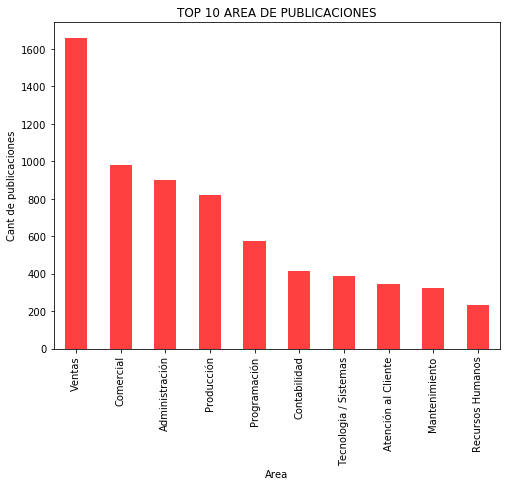

In [12]:
f = plt.figure()

plt.title ('TOP 10 AREA DE PUBLICACIONES',color='black')

ax = top10_publication_area.plot(kind='bar', stacked=True, figsize=(8,6) ,alpha=0.75, ax=f.gca(), color='red')


ax.set_ylabel('Cant de publicaciones')
ax.set_xlabel("Area")
plt.show()

ANALISIS DEL NIVEL EDUCATIVO DE LOS POSTULANTES

In [13]:
postulant_education = data_postulant_education["nombre"].value_counts()

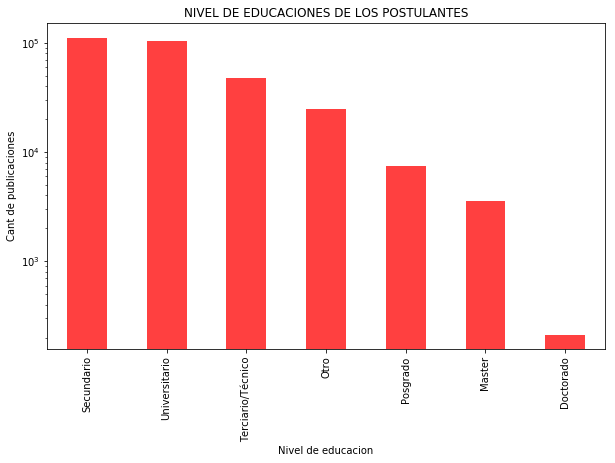

In [14]:
f = plt.figure()

plt.title ('NIVEL DE EDUCACIONES DE LOS POSTULANTES',color='black')

ax = postulant_education.plot(kind='bar', stacked=True, figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='red', logy= True )


ax.set_ylabel('Cant de publicaciones')
ax.set_xlabel("Nivel de educacion")
plt.show()

ANALISIS LA EDAD DE LOS POSTULANTES

In [4]:
#ver cuantas fechas incorrectas hay
data_postulant_sex_age["fechanacimiento"].isnull().value_counts()


False    196138
True       4750
Name: fechanacimiento, dtype: int64

In [5]:
#cambiamos el formato a datetime y dropeamos las incorrectas
data_postulant_sex_age["fechanacimiento"] = datetime(data_postulant_sex_age["fechanacimiento"],'%Y-%m-%d')
data_postulant_sex_age["fechanacimiento"] = data_postulant_sex_age["fechanacimiento"].dropna()

In [29]:
#nos quedamos con las fechas que nos interesan 
ages = data_postulant_sex_age[(data_postulant_sex_age["fechanacimiento"].dt.year>1948) & (data_postulant_sex_age["fechanacimiento"].dt.year<2000)]

#Calculamos la edad aproximadamente de los postulantes
years = ages["fechanacimiento"].map(lambda x: 2018 - x.year)


In [66]:
#me quedo con las mujeres que cumplen el rango de edad que queremos
ages_fem = ages[ages["sexo"] == "FEM"]
#calculo la edad
ages_fem = ages_fem["fechanacimiento"].map(lambda x: 2018 - x.year)



ages_masc = ages[ages["sexo"] == "MASC"]
ages_masc = ages_masc["fechanacimiento"].map(lambda x: 2018 - x.year)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


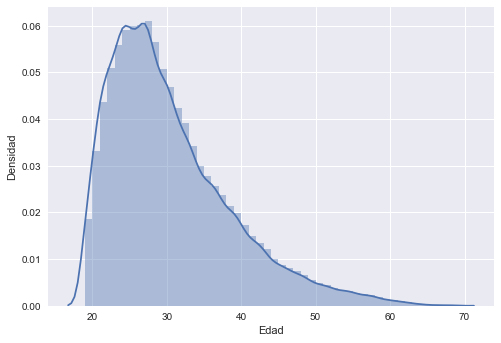

In [98]:
import seaborn as sns
sns.set(color_codes=True)

ax = sns.distplot(years)
ax.set_ylabel('Densidad')
ax.set_xlabel("Edad")
plt.show()

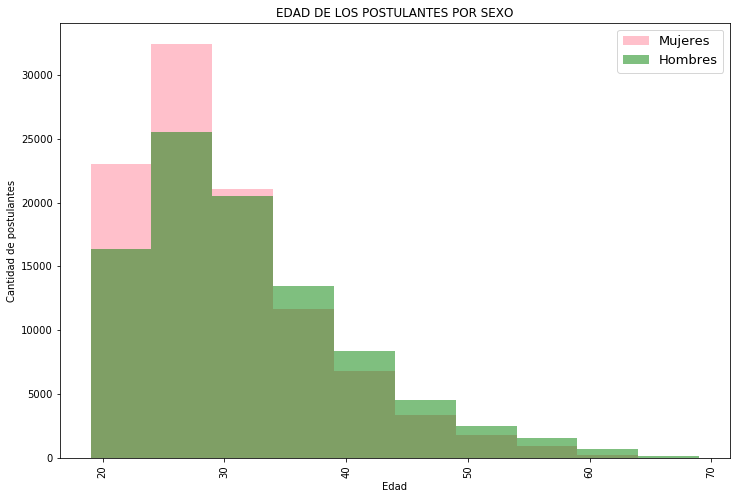

In [80]:
plt.title ('EDAD DE LOS POSTULANTES POR SEXO',color='black')

ax = years_fem.plot(kind='hist',rot=90,figsize=(12,8),color="pink", label = "Mujeres" ) 

years_masc.plot(kind='hist',rot=90,figsize=(12,8),color="green", alpha = 0.5, label = "Hombres" )

ax.legend(fontsize=13)
ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel("Edad")
plt.show()

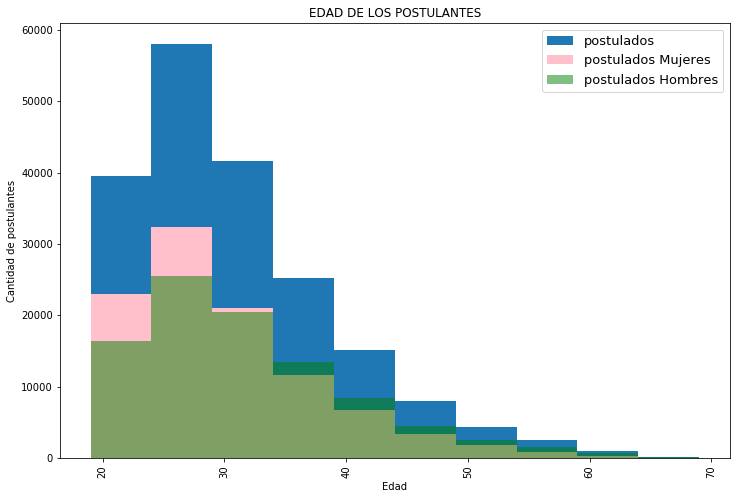

In [81]:
plt.title ('EDAD DE LOS POSTULANTES',color='black')

ax = years.plot(kind='hist',rot=90,figsize=(12,8), label = "postulados")

years_fem.plot(kind='hist',rot=90,figsize=(12,8),color="pink" , label = "postulados Mujeres") 

years_masc.plot(kind='hist',rot=90,figsize=(12,8),color="green", alpha = 0.5 , label = "postulados Hombres")

ax.legend(fontsize=13)
ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel("Edad")
plt.show()

In [ ]:
ANALISIS DE CUAL ES EL AREA CON MAS POSTULACIONES

In [100]:
id_ads = data_postulation["idaviso"]
id_counts = id_ads.value_counts()
id_counts_frame = id_counts.to_frame()
id_counts_frame = id_counts_frame.reset_index()
id_counts_frame.rename(columns={'idaviso':'count', 'index':'idaviso'}, inplace = True)
result = pd.merge(id_counts_frame, data_ads_details, how='left', on="idaviso")
result_postulation_area = result.groupby(["nombre_area"],sort =True)["count"].sum()





NameError: name 'data_postulation' is not defined

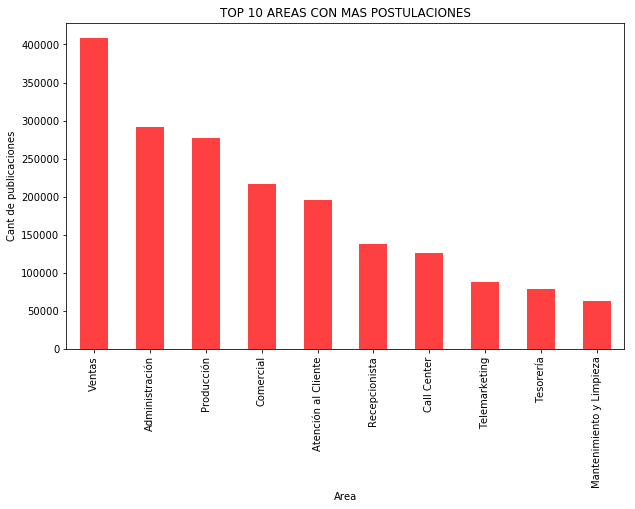

In [121]:
f = plt.figure()

plt.title ('TOP 10 AREAS CON MAS POSTULACIONES',color='black')

result_postulation_area_top_10 = result_postulation_area.sort_values()[-10:]

ax = result_postulation_area_top_10[::-1].plot(kind='bar', stacked=True, figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_ylabel('Cant de publicaciones')
ax.set_xlabel("Area")
plt.show()


ANALISIS DE POSTULACIONES DE LOS FINDE SEMANAS

In [84]:
data_postulation["fechapostulacion"] = datetime(data_postulation["fechapostulacion"],'%Y-%m-%d')


In [89]:
weekend_postulation = data_postulation[((data_postulation["fechapostulacion"].dt.weekday == 6 ) | (data_postulation["fechapostulacion"].dt.weekday == 5)) & (data_postulation["fechapostulacion"].dt.month == 2)]
weekend_postulation.head()

,idaviso,idpostulante,fechapostulacion
10,1112303543,5awk,2018-02-18 23:49:34
26,1112309589,ZaO5,2018-02-03 15:55:15
29,1112327122,ZaO5,2018-02-11 17:49:26
30,1112315062,ZaO5,2018-02-11 18:08:14
55,1112334932,NdJl,2018-02-17 16:17:35


In [104]:
dic_weekend = {3:1 , 4:1 , 10: 2 , 11:2 , 17:3 , 18:3 , 24:4 , 25:4 }
weekend_postulation["findedesemana"] = weekend_postulation["fechapostulacion"].map(lambda x: dic_weekend[x.day])
weekend_postulation

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,idaviso,idpostulante,fechapostulacion,findedesemana
10,1112303543,5awk,2018-02-18 23:49:34,3
26,1112309589,ZaO5,2018-02-03 15:55:15,1
29,1112327122,ZaO5,2018-02-11 17:49:26,2
30,1112315062,ZaO5,2018-02-11 18:08:14,2
55,1112334932,NdJl,2018-02-17 16:17:35,3
56,1112306543,NdJl,2018-02-17 16:19:05,3
92,1112342608,8BkL,2018-02-17 17:40:55,3
173,1112046656,ZPWlE,2018-02-04 16:55:50,1
174,1112265973,ZPWlE,2018-02-04 16:56:28,1
175,1112309589,ZPWlE,2018-02-04 16:57:42,1
